In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import os

In [3]:
files = os.listdir('calibration_wide')
files = files[1:]
print(len(files))
print(files)

37
['GOPR0033.jpg', 'GOPR0034.jpg', 'GOPR0035.jpg', 'GOPR0036.jpg', 'GOPR0037.jpg', 'GOPR0038.jpg', 'GOPR0040.jpg', 'GOPR0041.jpg', 'GOPR0042.jpg', 'GOPR0043.jpg', 'GOPR0044.jpg', 'GOPR0045.jpg', 'GOPR0046.jpg', 'GOPR0047.jpg', 'GOPR0048.jpg', 'GOPR0049.jpg', 'GOPR0050.jpg', 'GOPR0051.jpg', 'GOPR0052.jpg', 'GOPR0053.jpg', 'GOPR0054.jpg', 'GOPR0055.jpg', 'GOPR0057.jpg', 'GOPR0058.jpg', 'GOPR0059.jpg', 'GOPR0060.jpg', 'GOPR0061.jpg', 'GOPR0062.jpg', 'GOPR0063.jpg', 'GOPR0064.jpg', 'GOPR0066.jpg', 'GOPR0067.jpg', 'GOPR0068.jpg', 'GOPR0069.jpg', 'GOPR0070.jpg', 'test_image.jpg', 'wide_dist_pickle.p']


In [4]:
filenames = [os.path.join('calibration_wide',file) for file in files]
print(filenames)

['calibration_wide\\GOPR0033.jpg', 'calibration_wide\\GOPR0034.jpg', 'calibration_wide\\GOPR0035.jpg', 'calibration_wide\\GOPR0036.jpg', 'calibration_wide\\GOPR0037.jpg', 'calibration_wide\\GOPR0038.jpg', 'calibration_wide\\GOPR0040.jpg', 'calibration_wide\\GOPR0041.jpg', 'calibration_wide\\GOPR0042.jpg', 'calibration_wide\\GOPR0043.jpg', 'calibration_wide\\GOPR0044.jpg', 'calibration_wide\\GOPR0045.jpg', 'calibration_wide\\GOPR0046.jpg', 'calibration_wide\\GOPR0047.jpg', 'calibration_wide\\GOPR0048.jpg', 'calibration_wide\\GOPR0049.jpg', 'calibration_wide\\GOPR0050.jpg', 'calibration_wide\\GOPR0051.jpg', 'calibration_wide\\GOPR0052.jpg', 'calibration_wide\\GOPR0053.jpg', 'calibration_wide\\GOPR0054.jpg', 'calibration_wide\\GOPR0055.jpg', 'calibration_wide\\GOPR0057.jpg', 'calibration_wide\\GOPR0058.jpg', 'calibration_wide\\GOPR0059.jpg', 'calibration_wide\\GOPR0060.jpg', 'calibration_wide\\GOPR0061.jpg', 'calibration_wide\\GOPR0062.jpg', 'calibration_wide\\GOPR0063.jpg', 'calibration_

(960, 1280, 3)


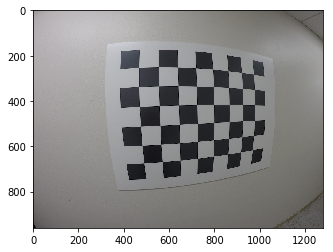

In [5]:
img = mpimg.imread(filenames[0])
print(img.shape)
plt.imshow(img)

In [6]:
objpoints = []
imgpoints = []

In [7]:
objp = np.zeros((6*8,3), np.float32)

In [8]:
matrix_coord = np.mgrid[0:8, 0:6]
print(matrix_coord)

[[[0 0 0 0 0 0]
  [1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]
  [7 7 7 7 7 7]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]]


In [9]:
print(matrix_coord.T)

[[[0 0]
  [1 0]
  [2 0]
  [3 0]
  [4 0]
  [5 0]
  [6 0]
  [7 0]]

 [[0 1]
  [1 1]
  [2 1]
  [3 1]
  [4 1]
  [5 1]
  [6 1]
  [7 1]]

 [[0 2]
  [1 2]
  [2 2]
  [3 2]
  [4 2]
  [5 2]
  [6 2]
  [7 2]]

 [[0 3]
  [1 3]
  [2 3]
  [3 3]
  [4 3]
  [5 3]
  [6 3]
  [7 3]]

 [[0 4]
  [1 4]
  [2 4]
  [3 4]
  [4 4]
  [5 4]
  [6 4]
  [7 4]]

 [[0 5]
  [1 5]
  [2 5]
  [3 5]
  [4 5]
  [5 5]
  [6 5]
  [7 5]]]


In [10]:
print(matrix_coord.T.reshape(-1, 2))

[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [7 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]
 [7 4]
 [0 5]
 [1 5]
 [2 5]
 [3 5]
 [4 5]
 [5 5]
 [6 5]
 [7 5]]


In [11]:
objp[:,:2] = matrix_coord.T.reshape(-1, 2)
print(objp)

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]]


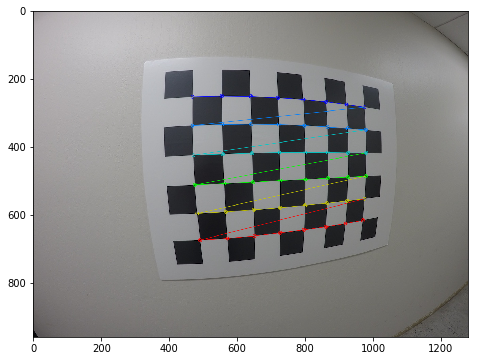

In [12]:
ret, corners =  cv2.findChessboardCorners(img, (8,6), None)

if ret==True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    

In [13]:
import glob

In [14]:
images = glob.glob('calibration_wide/GOPR*.jpg')
print(len(images))
print(images)

36
['calibration_wide\\GOPR0032.jpg', 'calibration_wide\\GOPR0033.jpg', 'calibration_wide\\GOPR0034.jpg', 'calibration_wide\\GOPR0035.jpg', 'calibration_wide\\GOPR0036.jpg', 'calibration_wide\\GOPR0037.jpg', 'calibration_wide\\GOPR0038.jpg', 'calibration_wide\\GOPR0040.jpg', 'calibration_wide\\GOPR0041.jpg', 'calibration_wide\\GOPR0042.jpg', 'calibration_wide\\GOPR0043.jpg', 'calibration_wide\\GOPR0044.jpg', 'calibration_wide\\GOPR0045.jpg', 'calibration_wide\\GOPR0046.jpg', 'calibration_wide\\GOPR0047.jpg', 'calibration_wide\\GOPR0048.jpg', 'calibration_wide\\GOPR0049.jpg', 'calibration_wide\\GOPR0050.jpg', 'calibration_wide\\GOPR0051.jpg', 'calibration_wide\\GOPR0052.jpg', 'calibration_wide\\GOPR0053.jpg', 'calibration_wide\\GOPR0054.jpg', 'calibration_wide\\GOPR0055.jpg', 'calibration_wide\\GOPR0057.jpg', 'calibration_wide\\GOPR0058.jpg', 'calibration_wide\\GOPR0059.jpg', 'calibration_wide\\GOPR0060.jpg', 'calibration_wide\\GOPR0061.jpg', 'calibration_wide\\GOPR0062.jpg', 'calibrati

In [15]:
img = cv2.imread(images[0])
ret, corners = cv2.findChessboardCorners(img, (8,6), None)
print(images[0])
print(corners)

calibration_wide\GOPR0032.jpg
[[[ 462.56226  161.33687]]

 [[ 579.8799   169.69809]]

 [[ 687.8985   184.06252]]

 [[ 782.25586  201.73724]]

 [[ 862.1208   220.18567]]

 [[ 928.7104   238.08705]]

 [[ 984.3671   254.6391 ]]

 [[1030.0714   270.0466 ]]

 [[ 456.55768  274.1514 ]]

 [[ 578.6278   278.15265]]

 [[ 690.1417   287.34195]]

 [[ 786.548    298.60617]]

 [[ 867.04956  310.93723]]

 [[ 934.027    322.4511 ]]

 [[ 989.10333  333.13348]]

 [[1035.0596   343.03595]]

 [[ 454.82315  397.9182 ]]

 [[ 578.5679   396.97278]]

 [[ 691.4448   399.01202]]

 [[ 788.15546  402.44266]]

 [[ 869.0511   406.34726]]

 [[ 935.97437  410.45865]]

 [[ 991.03076  414.30374]]

 [[1036.1946   418.09418]]

 [[ 458.9883   524.49   ]]

 [[ 580.9252   518.86096]]

 [[ 692.23376  512.9499 ]]

 [[ 787.9928   507.78   ]]

 [[ 868.16144  503.22232]]

 [[ 934.6879   499.27304]]

 [[ 989.3652   496.08884]]

 [[1034.5035   493.45694]]

 [[ 467.25424  643.9938 ]]

 [[ 584.6419   634.03534]]

 [[ 692.0061   621

In [16]:
objpoints = []
imgpoints = []

objp = np.zeros((6*8, 3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)

for imgname in images:
    img = mpimg.imread(imgname)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    ret, corners = cv2.findChessboardCorners(img, (8,6), None)
    
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        
        #同时画多个figure，会很占内存
        #plt.figure(figsize=(10,6))
        #plt.imshow(img)

(960, 1280, 3)


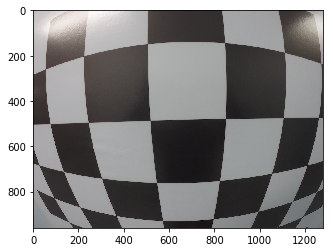

In [17]:
test_img = cv2.imread('calibration_wide/test_image.jpg')
print(test_img.shape)
plt.imshow(test_img)

In [18]:
img_size = test_img.shape[1::-1]
print(img_size)

(1280, 960)


In [19]:
import pickle

Text(0.5,1,'undistorted Image')

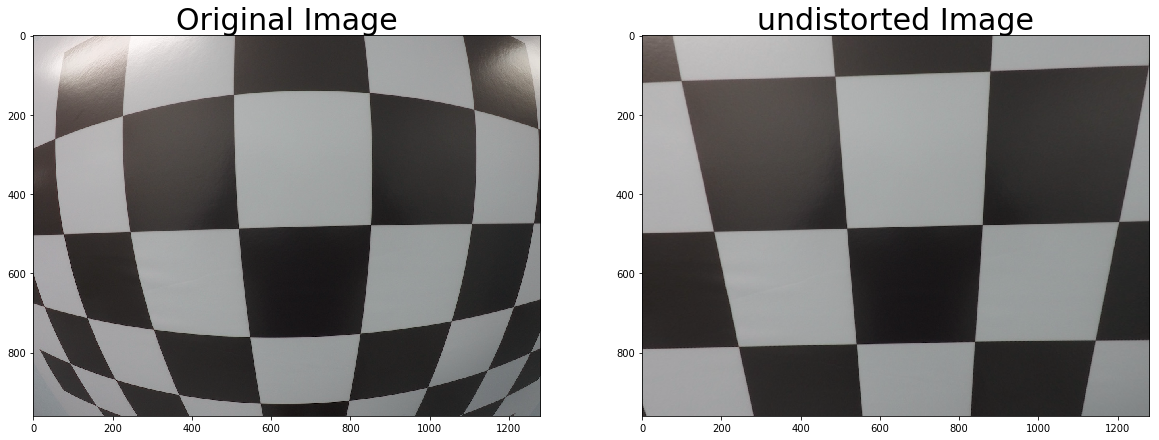

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(test_img, mtx, dist, None, mtx)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open( "calibration_wide/wide_dist_pickle.p",'wb'))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('undistorted Image', fontsize=30)

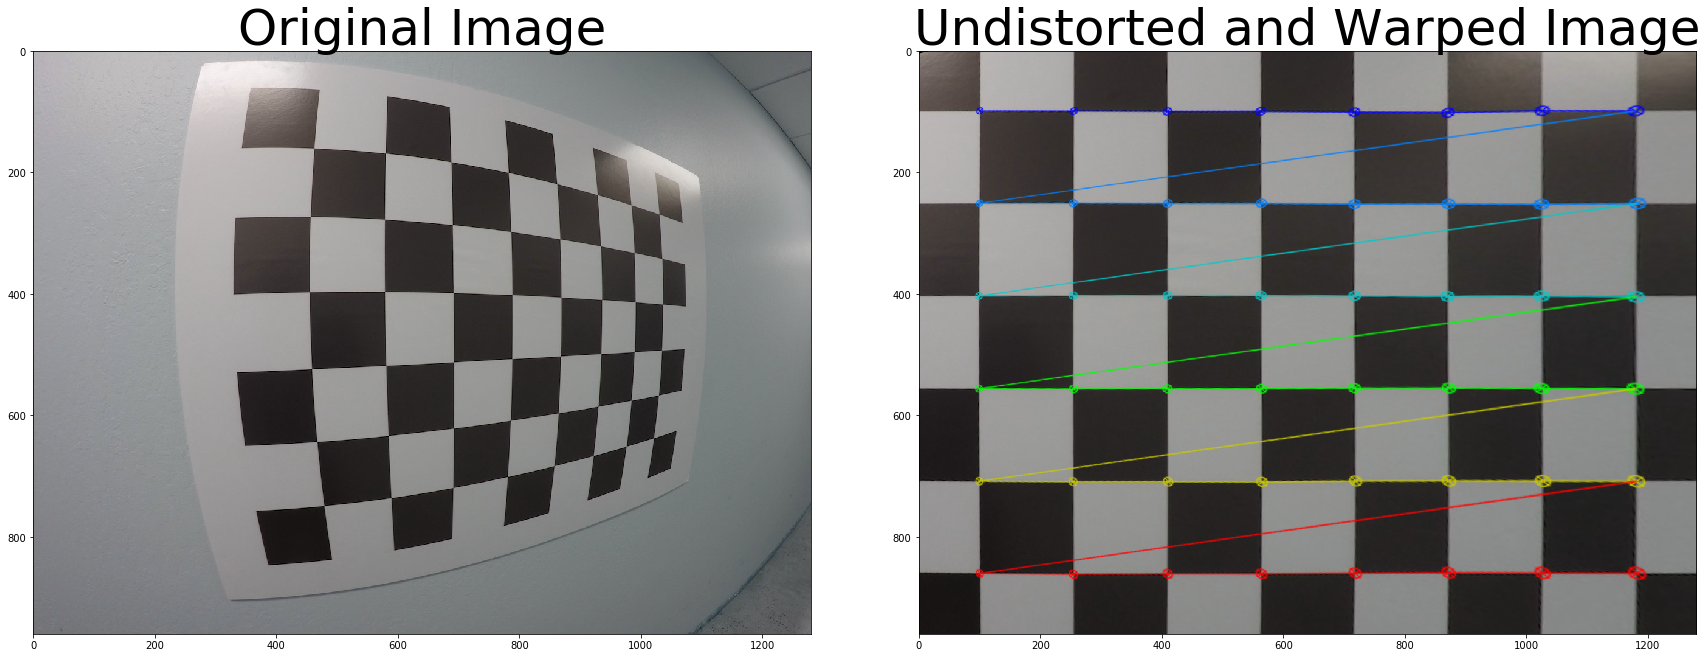

In [4]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open("calibration_wide/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
images = glob.glob('calibration_wide/*.jpg')
img = cv2.imread(images[0])
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img,mtx,dist, None, mtx)
    
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    
    if ret == True:
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)

        offset = 100
        img_size = (gray.shape[1], gray.shape[0])

        src = np.float32([corners[0],corners[nx-1],corners[-1], corners[-nx]])
        dst = np.float32([[offset,offset], [img_size[0]-offset,offset], [img_size[0]-offset,img_size[1]-offset], [offset, img_size[1]-offset]])
    
    
    M = cv2.getPerspectiveTransform(src, dst)
        
    warped = cv2.warpPerspective(undist, M, img_size)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()